# Assessing the Effectiveness of Railway Infrastructure in the CEMAC Region: 
# Economic, Environmental, and Operational Efficiency

##### The model explores how railway infrastructure investments influence productivity, trade volume, job creation, carbon emissions, and long-term regional development. The report uses dynamic modeling, including differential equations, to simulate these impacts.

## 1. Importing data

In [2]:
import pandas as pd
import os


import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt



In [3]:
# Define the directory containing the datasets
input_dir = "/kaggle/input/cemacregion/"

# Define file names explicitly
file_paths = {
    # CAR
    "CAR": "CAR.txt",
    # cOMBINED DATA
    "CEMAC": "CEMAC.txt",
    #City data
    "CITY_DATA": "CITY_DATA.xlsx",
    "Cameroon": "Cameroon.txt",
    "Chad": "Chad.txt",
    #Distances
    "City_Distance": "City_Distance.xlsx",
    "Congo": "Congo.txt",
    "EQ": "EQ.txt",
    "Gabon": "Gabon.txt",
    "citydistance": "citydistance.csv",
}


In [4]:
import os
import pandas as pd

# Define the input directory
input_dir = "/kaggle/input/cemacregion/"

# List of files to import
file_names = [
    "CAR.txt", "CEMAC.txt", "CITY_DATA.xlsx", "Cameroon.txt",
    "Chad.txt", "City_Distance.xlsx", "Congo.txt", "EQ.txt",
    "Gabon.txt", "citydistance.csv"
]
## Data on distances
###
###
##

# Dictionary to store datasets
datasets = {}

# Attempt different encodings if UTF-8 fails
encodings = ["utf-8", "ISO-8859-1", "latin1"]

# Load each dataset
for file_name in file_names:
    file_path = os.path.join(input_dir, file_name)
    
    for enc in encodings:
        try:
            if file_name.endswith(".txt"):
                df = pd.read_csv(file_path, encoding=enc, delimiter="\t", on_bad_lines="skip")
            elif file_name.endswith(".xlsx"):
                df = pd.read_excel(file_path, engine="openpyxl")
            elif file_name.endswith(".csv"):
                df = pd.read_csv(file_path, encoding=enc, on_bad_lines="skip")
            
            # Use the file name (without extension) as the key
            dataset_name = file_name.split('.')[0]  # Remove the extension
            datasets[dataset_name] = df
            print(f"✅ Successfully loaded: {file_name} with encoding: {enc}")
            break  # Stop trying encodings once successful
        except Exception as e:
            print(f"❌ Failed to load {file_name} with encoding {enc}: {e}")

# Now you can access datasets like Chad.head(), Cameroon.head(), etc.
# Example: 
# print(datasets["Chad"].head())  # or simply use: Chad.head() if you're in a Jupyter notebook environment


✅ Successfully loaded: CAR.txt with encoding: utf-8
✅ Successfully loaded: CEMAC.txt with encoding: utf-8
✅ Successfully loaded: CITY_DATA.xlsx with encoding: utf-8
✅ Successfully loaded: Cameroon.txt with encoding: utf-8
✅ Successfully loaded: Chad.txt with encoding: utf-8
✅ Successfully loaded: City_Distance.xlsx with encoding: utf-8
✅ Successfully loaded: Congo.txt with encoding: utf-8
✅ Successfully loaded: EQ.txt with encoding: utf-8
✅ Successfully loaded: Gabon.txt with encoding: utf-8
❌ Failed to load citydistance.csv with encoding utf-8: 'utf-8' codec can't decode byte 0xe9 in position 2: unexpected end of data
✅ Successfully loaded: citydistance.csv with encoding: ISO-8859-1


## Map

In [5]:
##map code

# 2.Processing Data

## Cameroon

In [6]:
# Check if the 'Trade Volume : current' column exists in the Cameroon dataset
if 'Trade Volume : current' in datasets["Cameroon"].columns:
    trade_volume_data = datasets["Cameroon"][['Time (Month)', 'Trade Volume : current']]
    print(trade_volume_data.head(-10))  # Show the first few rows
else:
    print("The 'Trade Volume : current' column is not available in the Cameroon dataset.")


    Time (Month)  Trade Volume : current
0           2019                 80.0000
1           2020                 80.0373
2           2021                 80.0841
3           2022                 80.1431
4           2023                 80.2175
5           2024                 80.3111
6           2025                 80.4286
7           2026                 80.5741
8           2027                 80.7515
9           2028                 80.9644
10          2029                 81.2151
11          2030                 81.5034


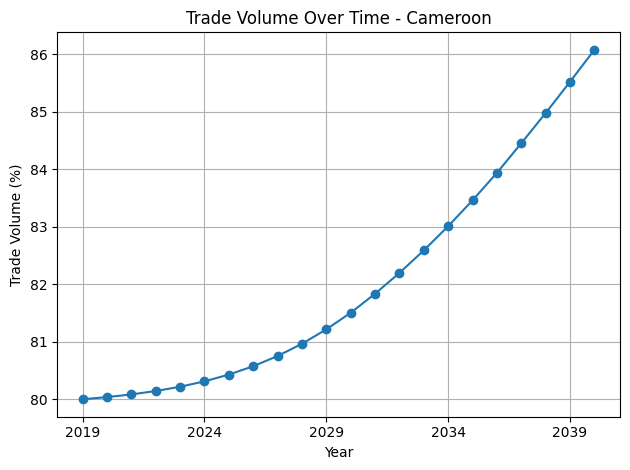

In [7]:
import matplotlib.pyplot as plt

# Simple line plot for Trade Volume with x-axis ticks every 5 years
plt.plot(trade_volume_data['Time (Month)'], trade_volume_data['Trade Volume : current'], marker='o')

plt.title('Trade Volume Over Time - Cameroon')
plt.xlabel('Year')
plt.ylabel('Trade Volume (%)')

# Set x-ticks at intervals of 5 years
plt.xticks(trade_volume_data['Time (Month)'][::5])

plt.grid(True)
plt.tight_layout()

plt.show()


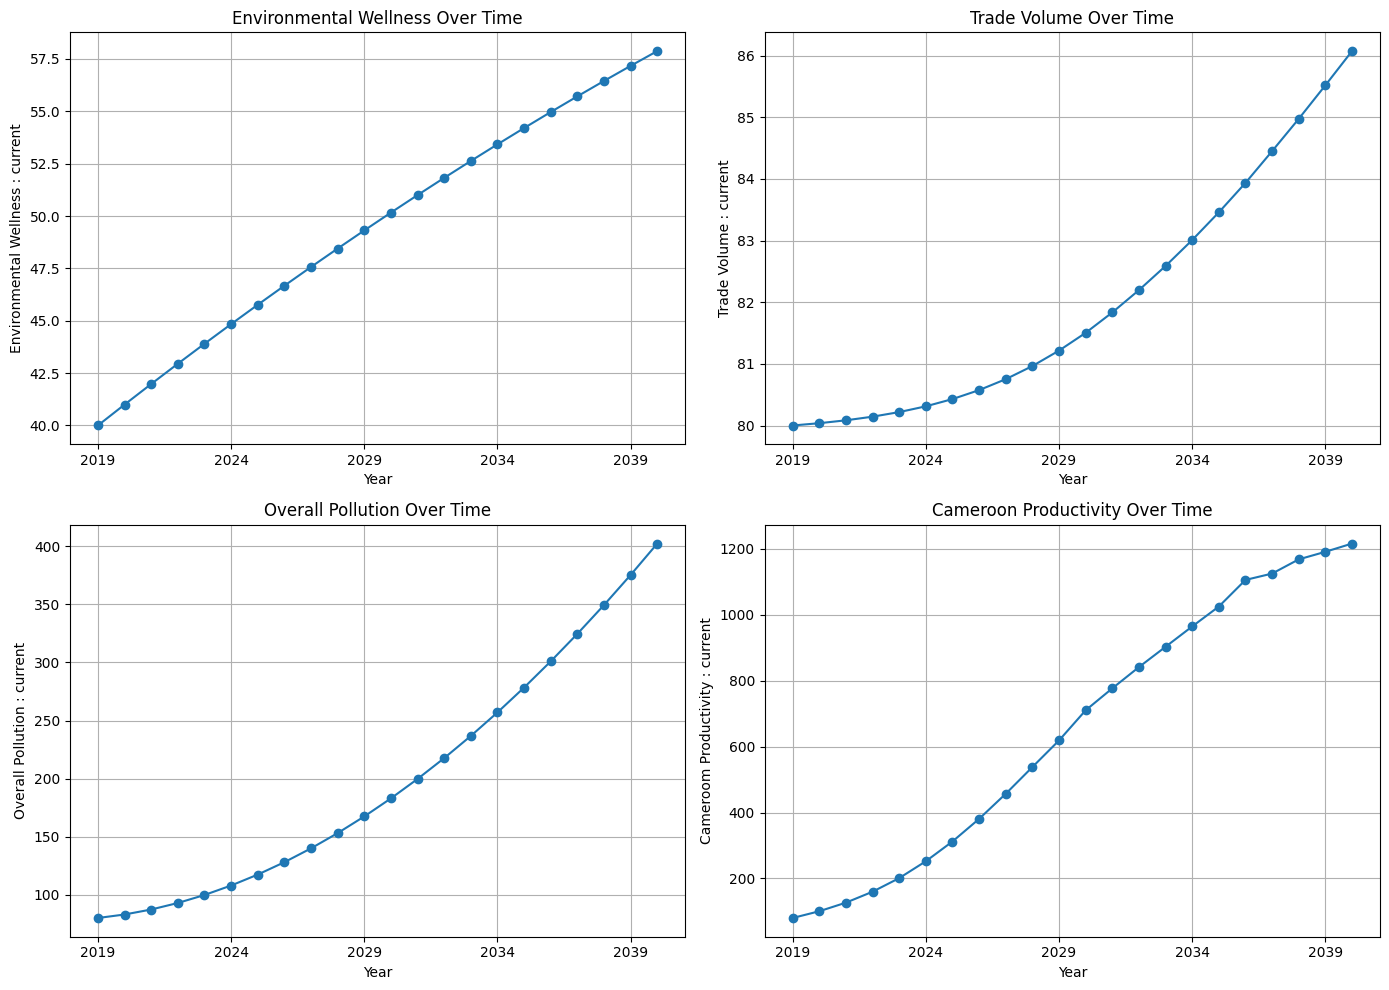

In [13]:
import matplotlib.pyplot as plt

# Define variables to plot
variables = ['Environmental Wellness : current', 
             'Trade Volume : current', 
             'Overall Pollution : current', 
             'Cameroom Productivity : current']

titles = ['Environmental Wellness Over Time',
          'Trade Volume Over Time',
          'Overall Pollution Over Time',
          'Cameroon Productivity Over Time']

# Prepare the figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns grid

# Flatten the axs array for easy looping
axs = axs.flatten()

# Loop through variables and plot each
for i, var in enumerate(variables):
    if var in datasets["Cameroon"].columns:
        axs[i].plot(datasets["Cameroon"]['Time (Month)'], datasets["Cameroon"][var], marker='o')
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('Year')
        axs[i].set_ylabel(var)
        axs[i].grid(True)
        axs[i].set_xticks(datasets["Cameroon"]['Time (Month)'][::5])  # Interval of 5 years
    else:
        axs[i].text(0.5, 0.5, f'{var} not found', horizontalalignment='center', verticalalignment='center')
        axs[i].set_axis_off()

plt.tight_layout()
plt.show()


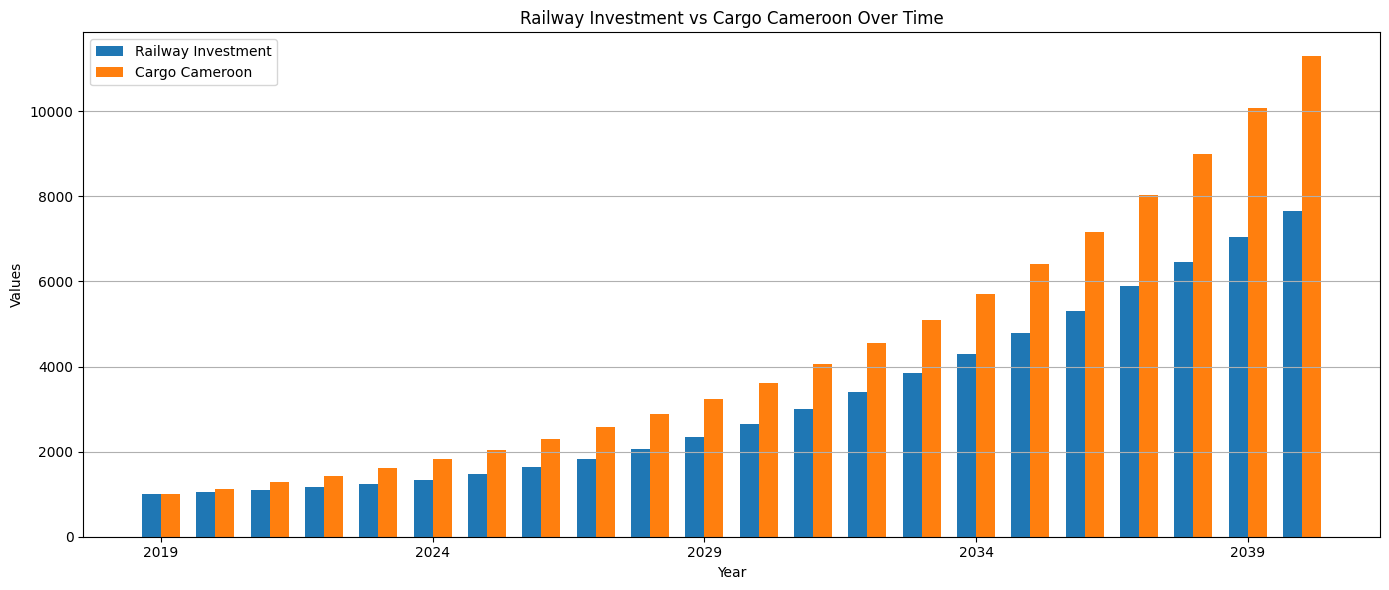

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = datasets["Cameroon"]['Time (Month)']
rail = datasets["Cameroon"]['Railway infrastructure investment : current']
cargo = datasets["Cameroon"]['Cargo Cameroon : current']

x = np.arange(len(years))  # X-axis positions
width = 0.35  # Width of each bar

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, rail, width, label='Railway Investment')
plt.bar(x + width/2, cargo, width, label='Cargo Cameroon')

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Railway Investment vs Cargo Cameroon Over Time')
plt.xticks(x[::5], years[::5])  # Tick every 5 years
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


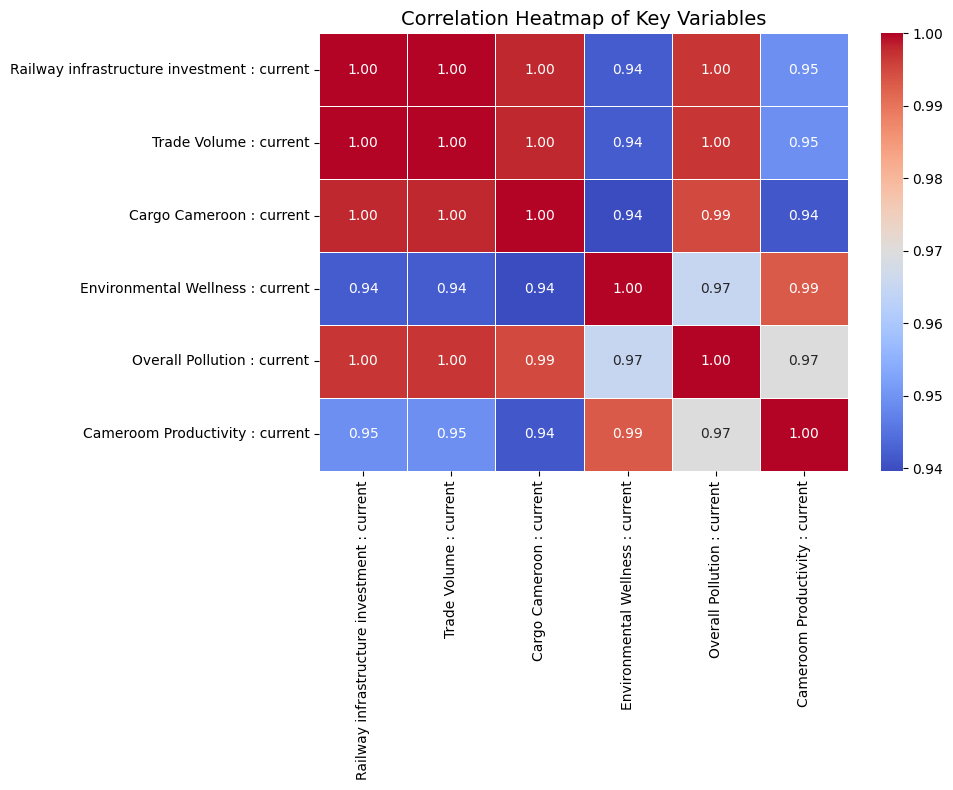

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select all relevant variables
selected_vars = ['Railway infrastructure investment : current',
                 'Trade Volume : current',
                 'Cargo Cameroon : current',
                 'Environmental Wellness : current',
                 'Overall Pollution : current',
                 'Cameroom Productivity : current']

# Extract the data
heatmap_data = datasets["Cameroon"][selected_vars]

# Compute correlation matrix
corr = heatmap_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Correlation Heatmap of Key Variables', fontsize=14)
plt.tight_layout()
plt.show()


#### The heatmap shows the strength and direction of the relationships between key variables in Cameroon’s development. It helps to quickly identify which factors move together positively or negatively, allowing for better understanding of potential drivers and barriers within the system.

In [20]:
import plotly.graph_objects as go

# Define nodes (variables)
labels = [
    'Railway Infrastructure', 'Trade Volume', 'Cargo Cameroon',
    'Environmental Wellness', 'Overall Pollution', 'Cameroon Productivity'
]

source = [0, 1, 2, 0, 3, 4]  # From
target = [1, 2, 3, 4, 5, 5]  # To
value =  [10, 8, 6, 5, 7, 9]  # Flow strength (dummy values)

# Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="skyblue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(title_text="Sankey Diagram - Cameroon Key Variables Flow", font_size=12)
fig.show()


##### The Sankey diagram visually illustrates the flow and interconnectedness between key economic and environmental variables in Cameroon, highlighting how investments and activities influence outcomes like productivity and wellness. It effectively shows the relative strength of relationships, making it easier to trace how inputs like infrastructure or trade drive changes across different sectors.

## CENTRAL AFRICA REPUBLIC

##### No railyway line in CAR

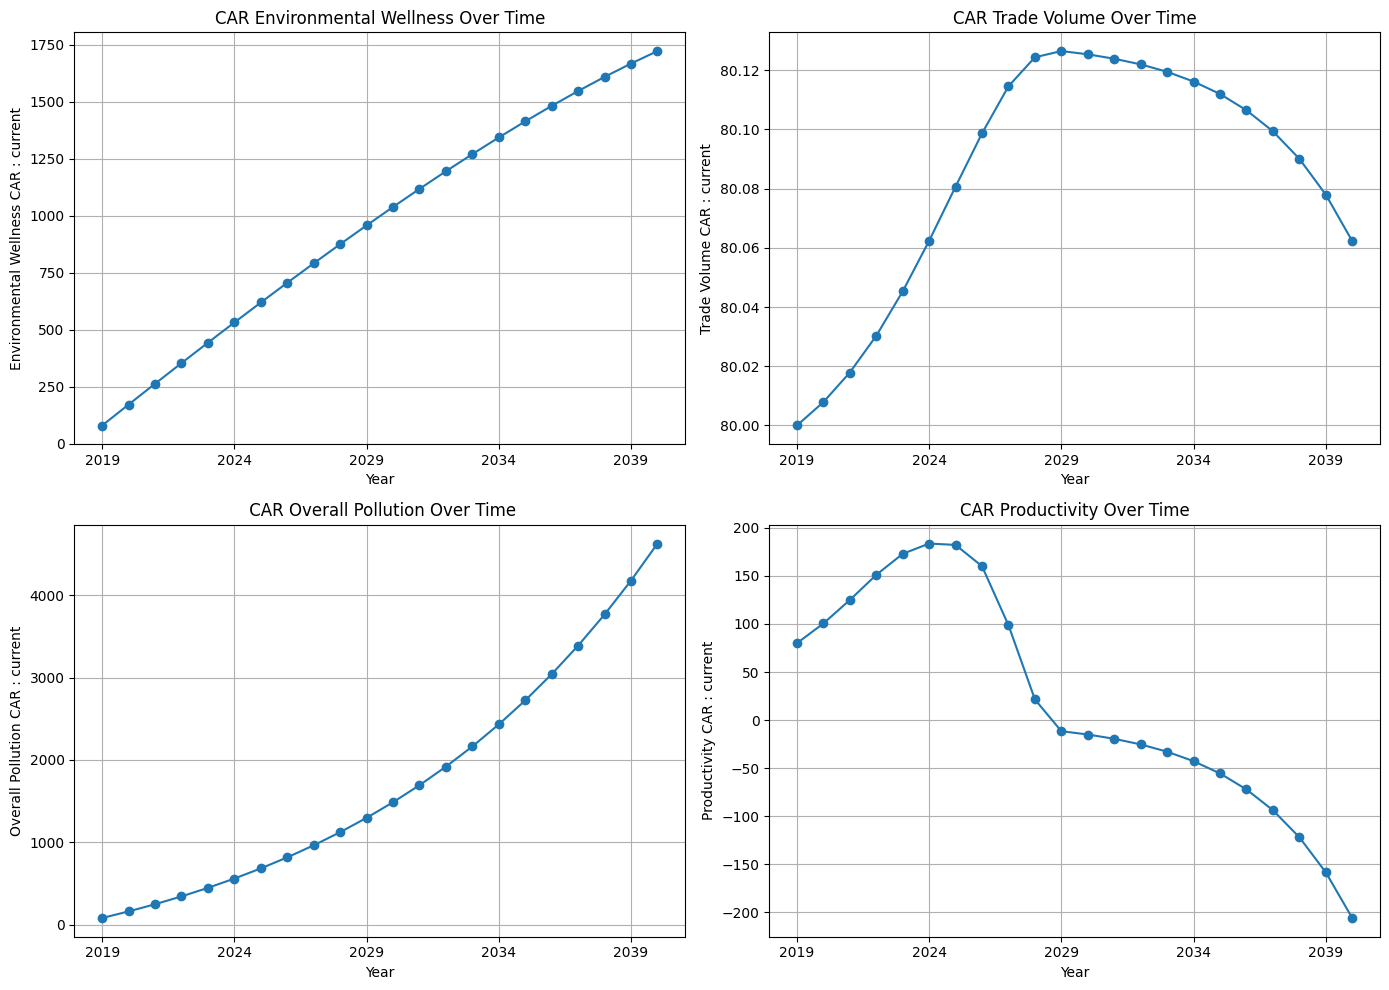

In [24]:
import matplotlib.pyplot as plt

# Define variables to plot
variables = ['Environmental Wellness CAR : current', 
             'Trade Volume CAR : current', 
             'Overall Pollution CAR : current', 
             'Productivity CAR : current']

titles = ['CAR Environmental Wellness Over Time',
          'CAR Trade Volume Over Time',
          ' CAR Overall Pollution Over Time',
          'CAR Productivity Over Time']

# Prepare the figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns grid

# Flatten the axs array for easy looping
axs = axs.flatten()

# Loop through variables and plot each
for i, var in enumerate(variables):
    if var in datasets["CAR"].columns:
        axs[i].plot(datasets["CAR"]['Time (Month)'], datasets["CAR"][var], marker='o')
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('Year')
        axs[i].set_ylabel(var)
        axs[i].grid(True)
        axs[i].set_xticks(datasets["CAR"]['Time (Month)'][::5])  # Interval of 5 years
    else:
        axs[i].text(0.5, 0.5, f'{var} not found', horizontalalignment='center', verticalalignment='center')
        axs[i].set_axis_off()

plt.tight_layout()
plt.show()


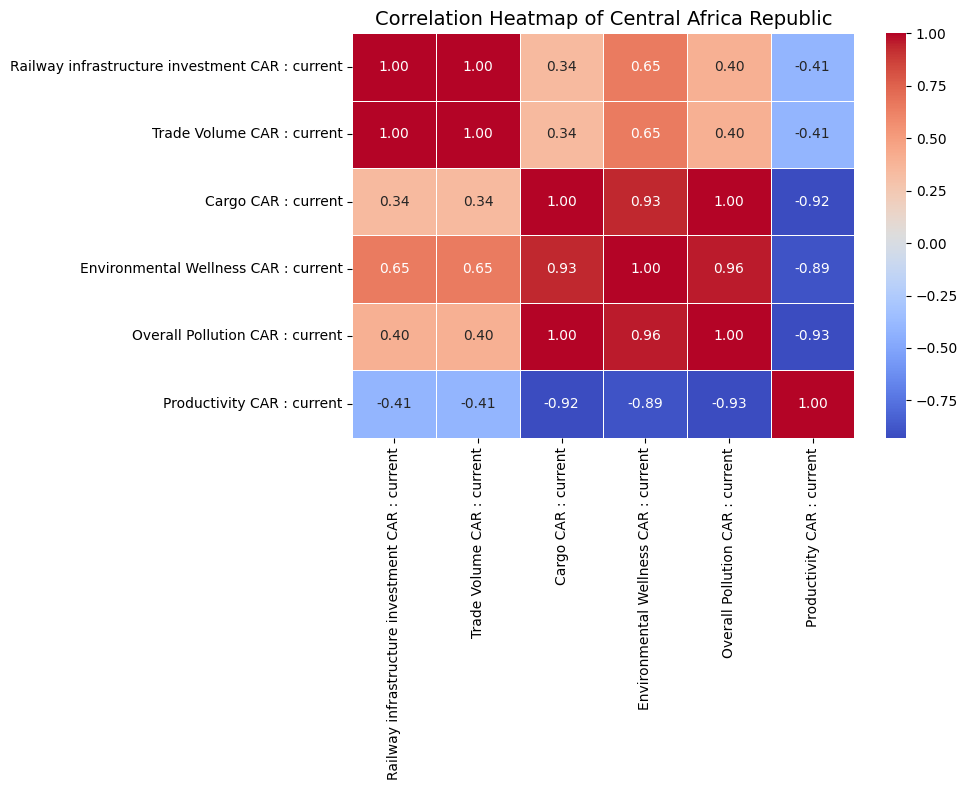

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select all relevant variables
selected_vars = ['Railway infrastructure investment CAR : current',
                 'Trade Volume CAR : current',
                 'Cargo CAR : current',
                 'Environmental Wellness CAR : current',
                 'Overall Pollution CAR : current',
                 'Productivity CAR : current']

# Extract the data
heatmap_data = datasets["CAR"][selected_vars]

# Compute correlation matrix
corr = heatmap_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Correlation Heatmap of Central Africa Republic', fontsize=14)
plt.tight_layout()
plt.show()


## Equitorial Guinea

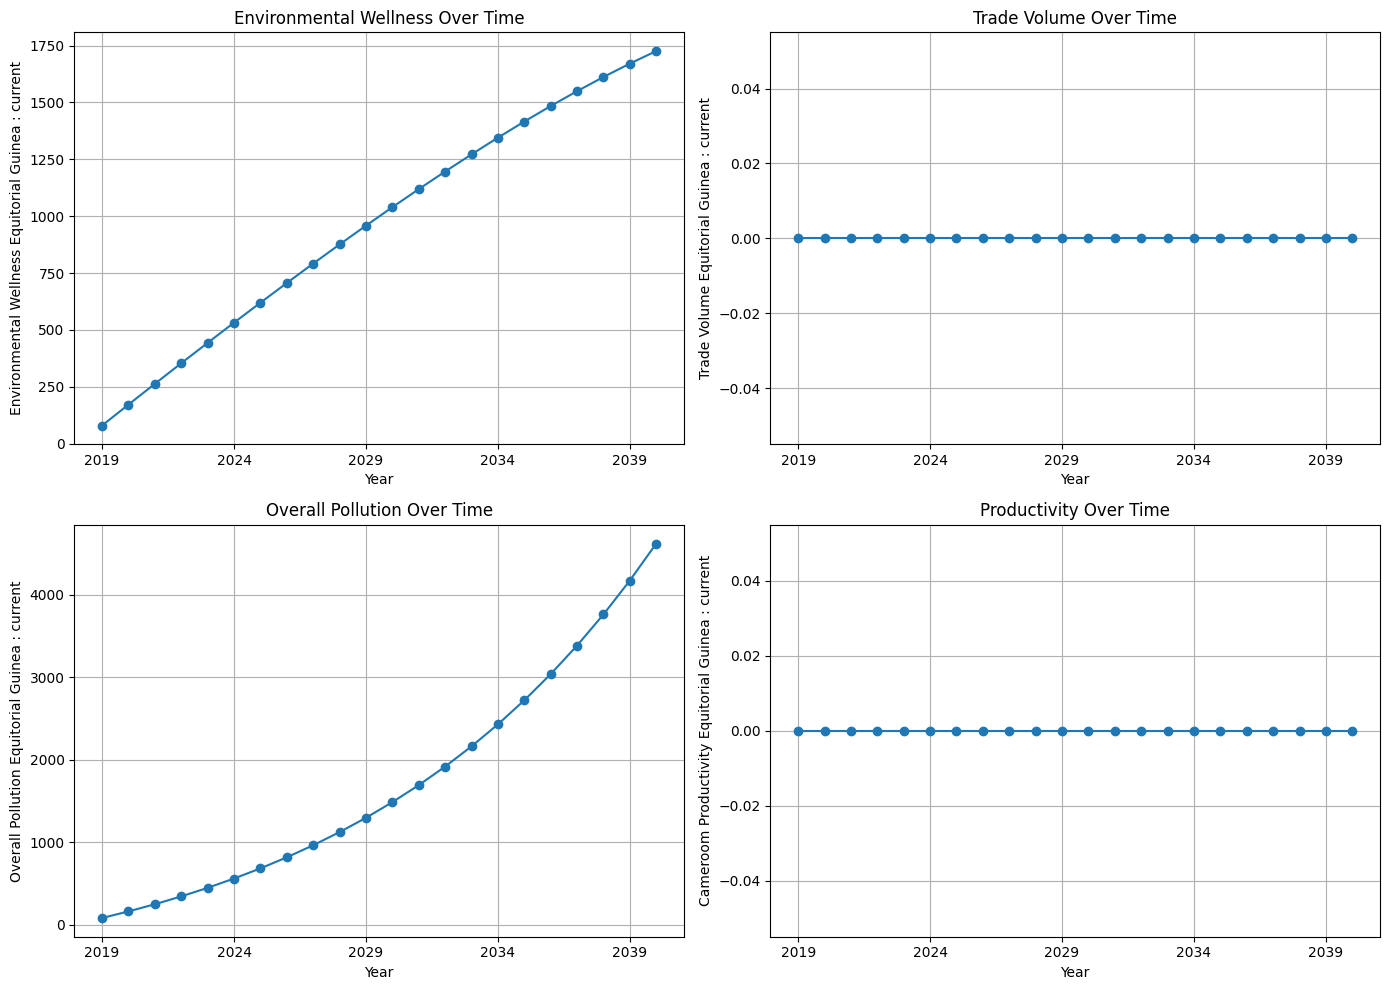

In [33]:
import matplotlib.pyplot as plt

# Define variables to plot
variables = ['Environmental Wellness Equitorial Guinea : current', 
             'Trade Volume Equitorial Guinea : current', 
             'Overall Pollution Equitorial Guinea : current', 
             'Cameroom Productivity Equitorial Guinea : current']

titles = ['Environmental Wellness Over Time',
          'Trade Volume Over Time',
          'Overall Pollution Over Time',
          'Productivity Over Time']

# Prepare the figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns grid

# Flatten the axs array for easy looping
axs = axs.flatten()

# Loop through variables and plot each
for i, var in enumerate(variables):
    if var in datasets["EQ"].columns:
        axs[i].plot(datasets["EQ"]['Time (Month)'], datasets["EQ"][var], marker='o')
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('Year')
        axs[i].set_ylabel(var)
        axs[i].grid(True)
        axs[i].set_xticks(datasets["EQ"]['Time (Month)'][::5])  # Interval of 5 years
    else:
        axs[i].text(0.5, 0.5, f'{var} not found', horizontalalignment='center', verticalalignment='center')
        axs[i].set_axis_off()

plt.tight_layout()
plt.show()


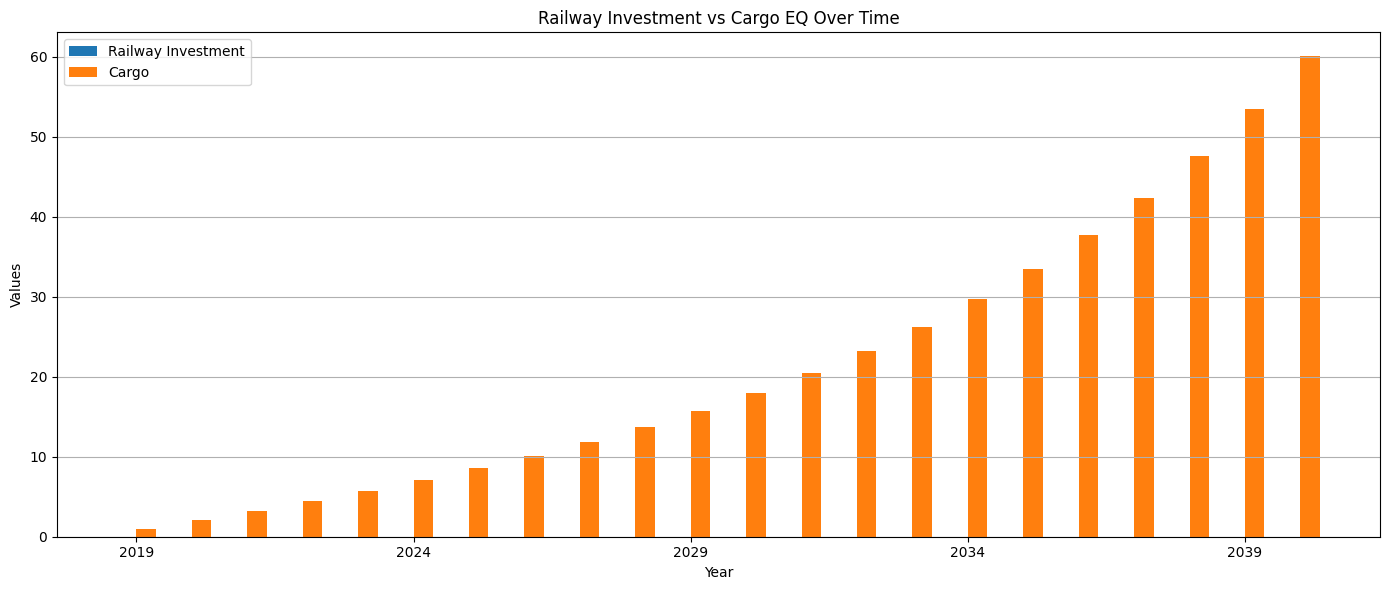

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = datasets["EQ"]['Time (Month)']
rail = datasets["EQ"]['Railway infrastructure investment Equitorial Guinea : current']
cargo = datasets["EQ"]['Cargo Equitorial Guinea : current']

x = np.arange(len(years))  # X-axis positions
width = 0.35  # Width of each bar

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, rail, width, label='Railway Investment')
plt.bar(x + width/2, cargo, width, label='Cargo')

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Railway Investment vs Cargo EQ Over Time')
plt.xticks(x[::5], years[::5])  # Tick every 5 years
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less



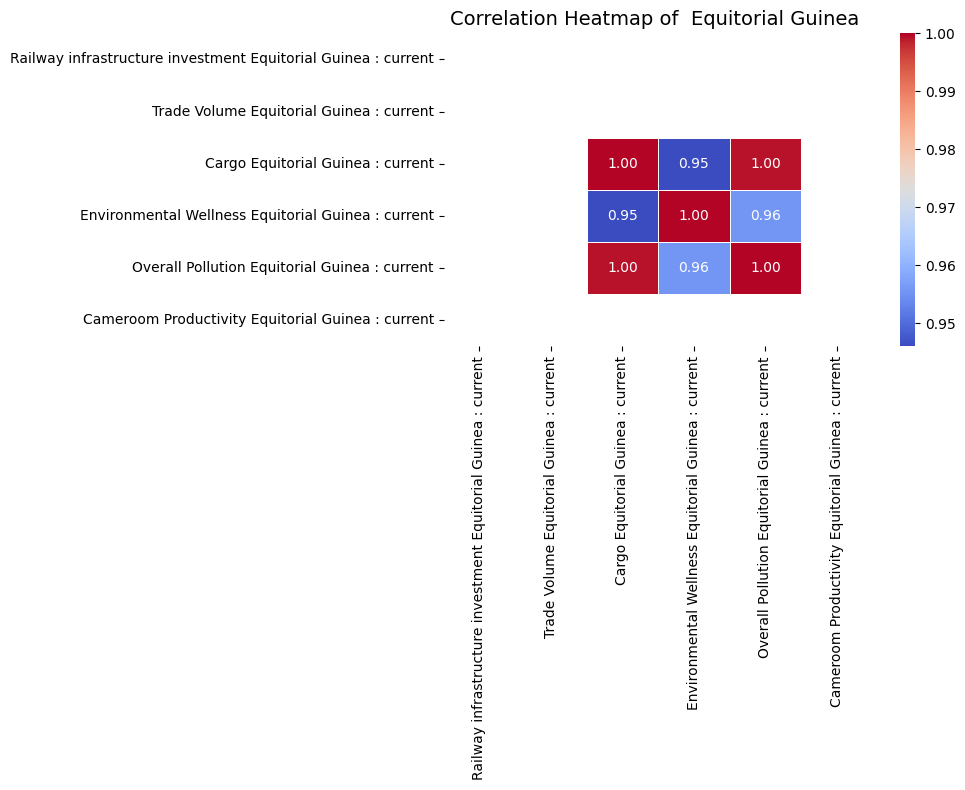

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select all relevant variables
selected_vars = ['Railway infrastructure investment Equitorial Guinea : current',
                 'Trade Volume Equitorial Guinea : current',
                 'Cargo Equitorial Guinea : current',
                 'Environmental Wellness Equitorial Guinea : current',
                 'Overall Pollution Equitorial Guinea : current',
                 'Cameroom Productivity Equitorial Guinea : current']

# Extract the data
heatmap_data = datasets["EQ"][selected_vars]

# Compute correlation matrix
corr = heatmap_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Correlation Heatmap of  Equitorial Guinea ', fontsize=14)
plt.tight_layout()
plt.show()


## Gabon

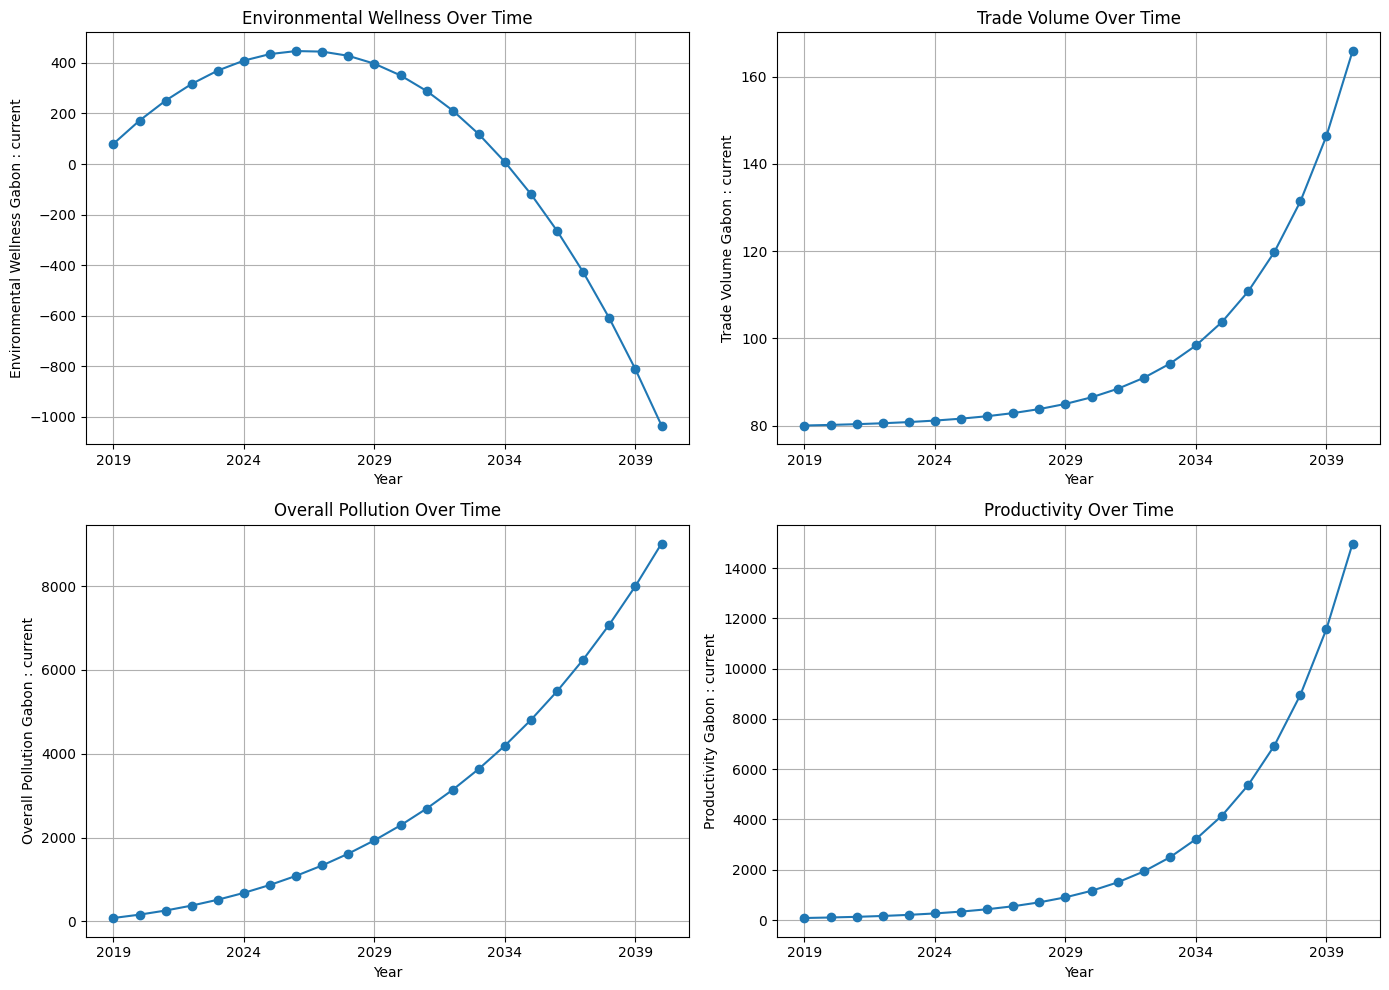

In [43]:
import matplotlib.pyplot as plt

# Define variables to plot
variables = ['Environmental Wellness Gabon : current', 
             'Trade Volume Gabon : current', 
             'Overall Pollution Gabon : current', 
             'Productivity Gabon : current']

titles = ['Environmental Wellness Over Time',
          'Trade Volume Over Time',
          'Overall Pollution Over Time',
          'Productivity Over Time']

# Prepare the figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns grid

# Flatten the axs array for easy looping
axs = axs.flatten()

# Loop through variables and plot each
for i, var in enumerate(variables):
    if var in datasets["Gabon"].columns:
        axs[i].plot(datasets["Gabon"]['Time (Month)'], datasets["Gabon"][var], marker='o')
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('Year')
        axs[i].set_ylabel(var)
        axs[i].grid(True)
        axs[i].set_xticks(datasets["Gabon"]['Time (Month)'][::5])  # Interval of 5 years
    else:
        axs[i].text(0.5, 0.5, f'{var} not found', horizontalalignment='center', verticalalignment='center')
        axs[i].set_axis_off()

plt.tight_layout()
plt.show()


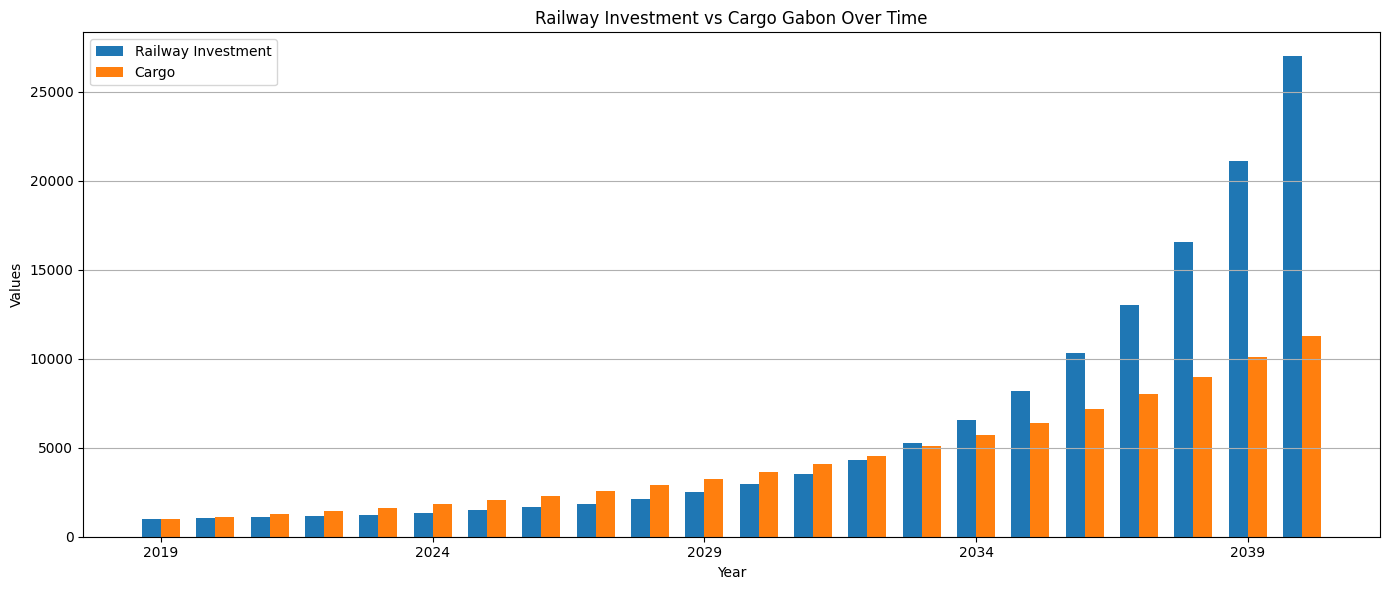

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = datasets["Gabon"]['Time (Month)']
rail = datasets["Gabon"]['Railway infrastructure investment Gabon : current']
cargo = datasets["Gabon"]['Cargo Gabon : current']

x = np.arange(len(years))  # X-axis positions
width = 0.35  # Width of each bar

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, rail, width, label='Railway Investment')
plt.bar(x + width/2, cargo, width, label='Cargo')

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Railway Investment vs Cargo Gabon Over Time')
plt.xticks(x[::5], years[::5])  # Tick every 5 years
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


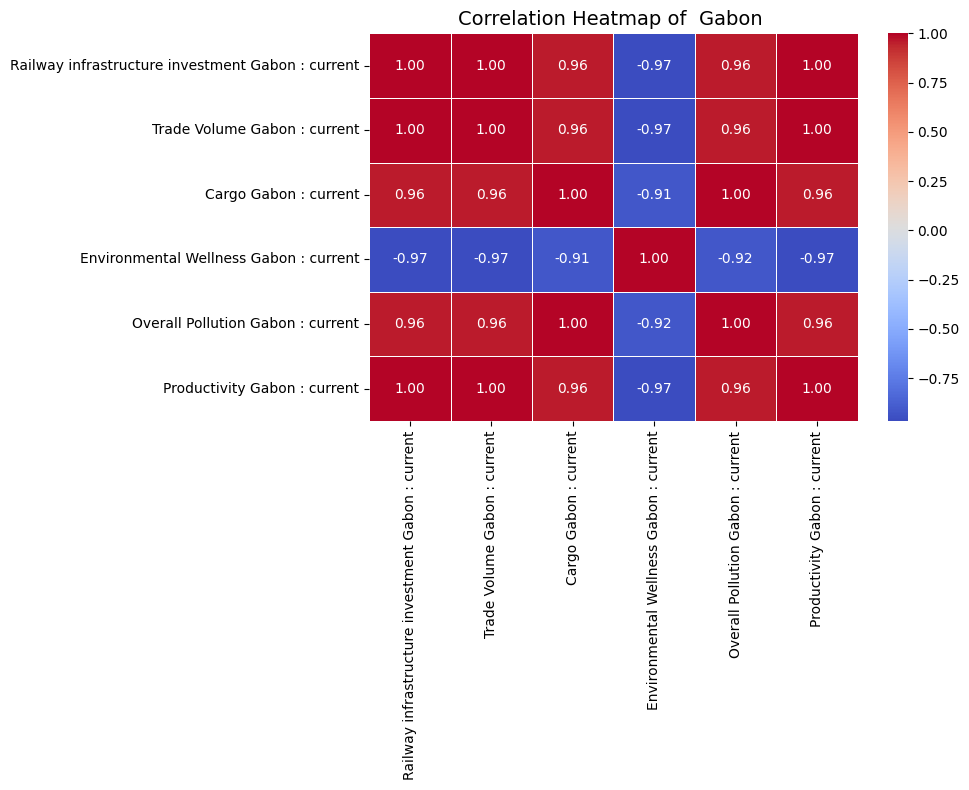

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select all relevant variables
selected_vars = ['Railway infrastructure investment Gabon : current',
                 'Trade Volume Gabon : current',
                 'Cargo Gabon : current',
                 'Environmental Wellness Gabon : current',
                 'Overall Pollution Gabon : current',
                 'Productivity Gabon : current']

# Extract the data
heatmap_data = datasets["Gabon"][selected_vars]

# Compute correlation matrix
corr = heatmap_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Correlation Heatmap of  Gabon ', fontsize=14)
plt.tight_layout()
plt.show()


## Chad

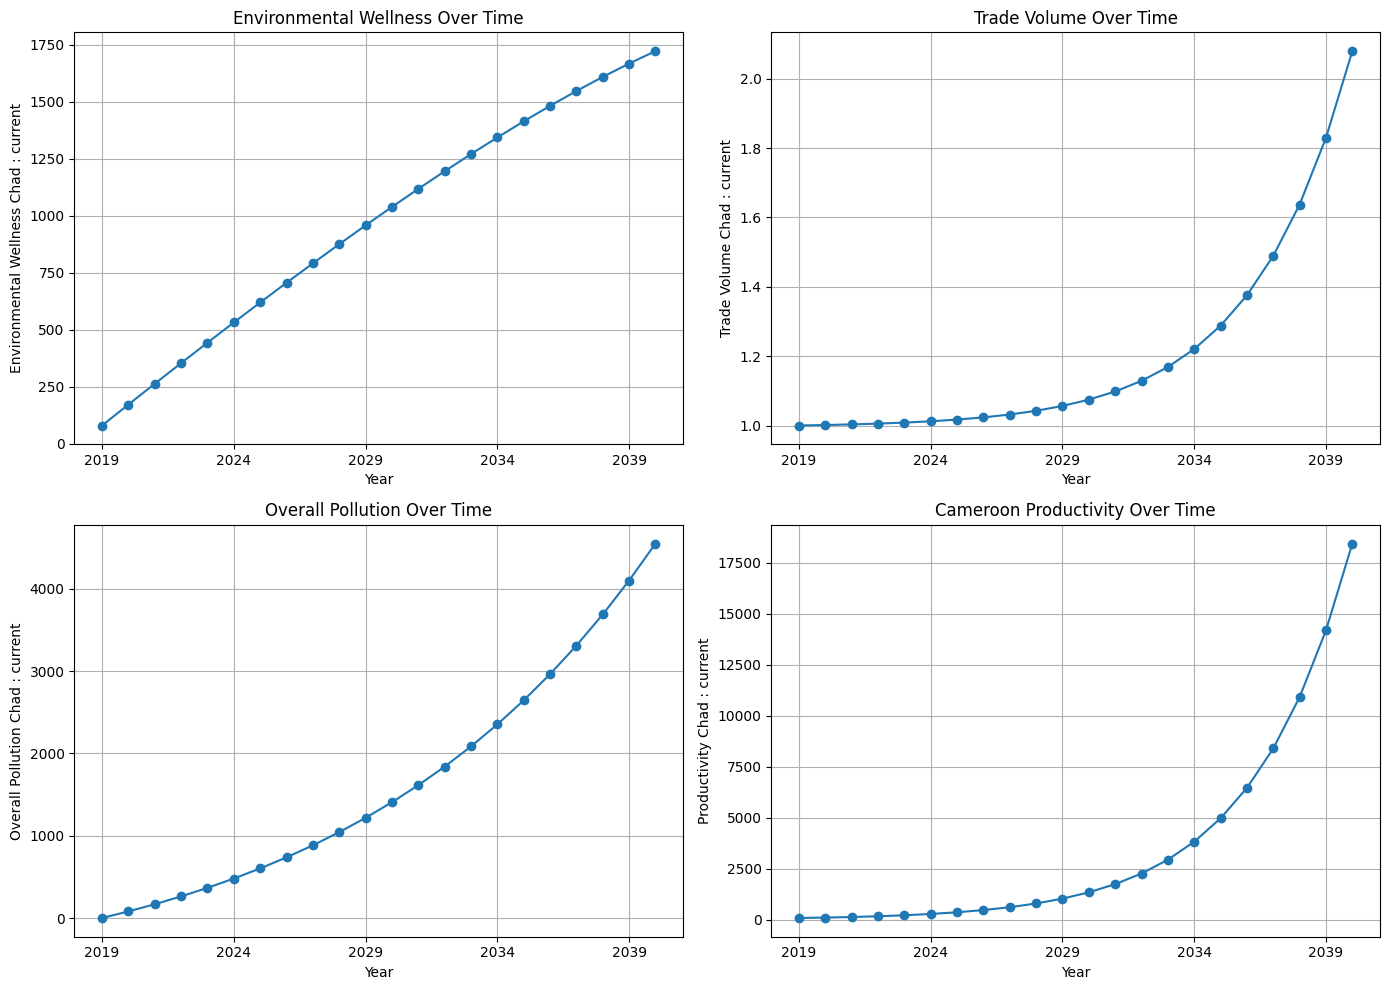

In [55]:
import matplotlib.pyplot as plt

# Define variables to plot
variables = ['Environmental Wellness Chad : current', 
             'Trade Volume Chad : current', 
             'Overall Pollution Chad : current', 
             'Productivity Chad : current']

titles = ['Environmental Wellness Over Time',
          'Trade Volume Over Time',
          'Overall Pollution Over Time',
          'Cameroon Productivity Over Time']

# Prepare the figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns grid

# Flatten the axs array for easy looping
axs = axs.flatten()

# Loop through variables and plot each
for i, var in enumerate(variables):
    if var in datasets["Chad"].columns:
        axs[i].plot(datasets["Chad"]['Time (Month)'], datasets["Chad"][var], marker='o')
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('Year')
        axs[i].set_ylabel(var)
        axs[i].grid(True)
        axs[i].set_xticks(datasets["Chad"]['Time (Month)'][::5])  # Interval of 5 years
    else:
        axs[i].text(0.5, 0.5, f'{var} not found', horizontalalignment='center', verticalalignment='center')
        axs[i].set_axis_off()

plt.tight_layout()
plt.show()


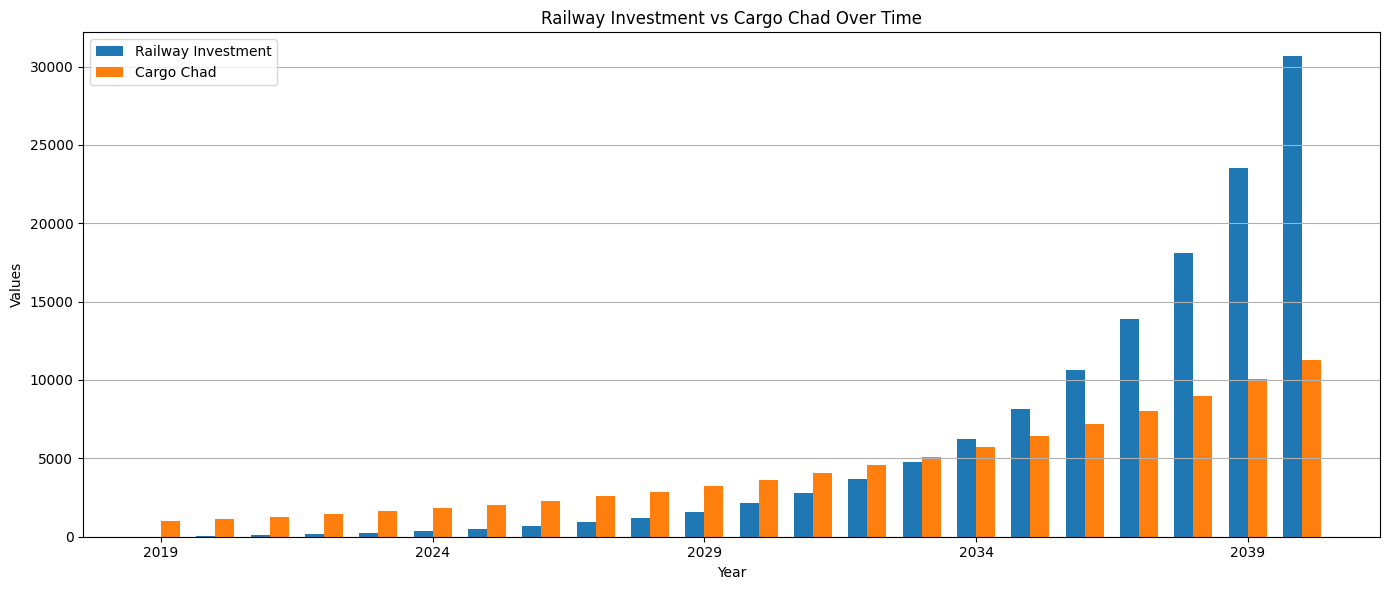

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = datasets["Chad"]['Time (Month)']
rail = datasets["Chad"]['Railway infrastructure investment Chad : current']
cargo = datasets["Chad"]['Cargo Chad : current']

x = np.arange(len(years))  # X-axis positions
width = 0.35  # Width of each bar

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, rail, width, label='Railway Investment')
plt.bar(x + width/2, cargo, width, label='Cargo Chad')

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Railway Investment vs Cargo Chad Over Time')
plt.xticks(x[::5], years[::5])  # Tick every 5 years
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


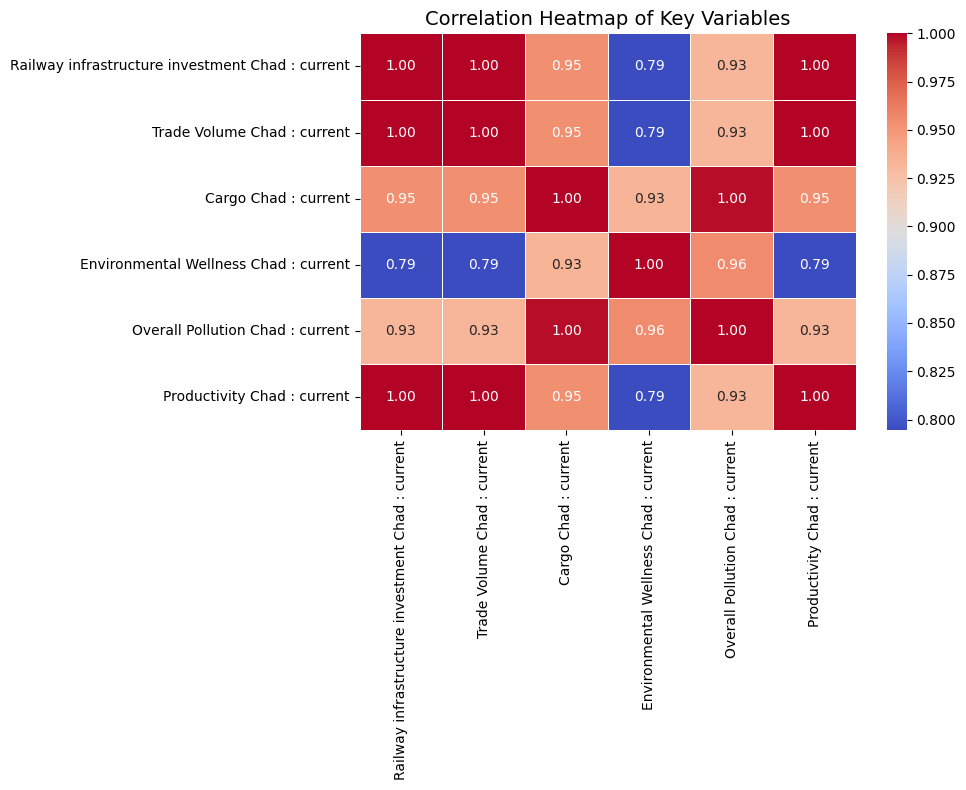

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select all relevant variables
selected_vars = ['Railway infrastructure investment Chad : current',
                 'Trade Volume Chad : current',
                 'Cargo Chad : current',
                 'Environmental Wellness Chad : current',
                 'Overall Pollution Chad : current',
                 'Productivity Chad : current']

# Extract the data
heatmap_data = datasets["Chad"][selected_vars]

# Compute correlation matrix
corr = heatmap_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Correlation Heatmap of Key Variables', fontsize=14)
plt.tight_layout()
plt.show()


## Congo

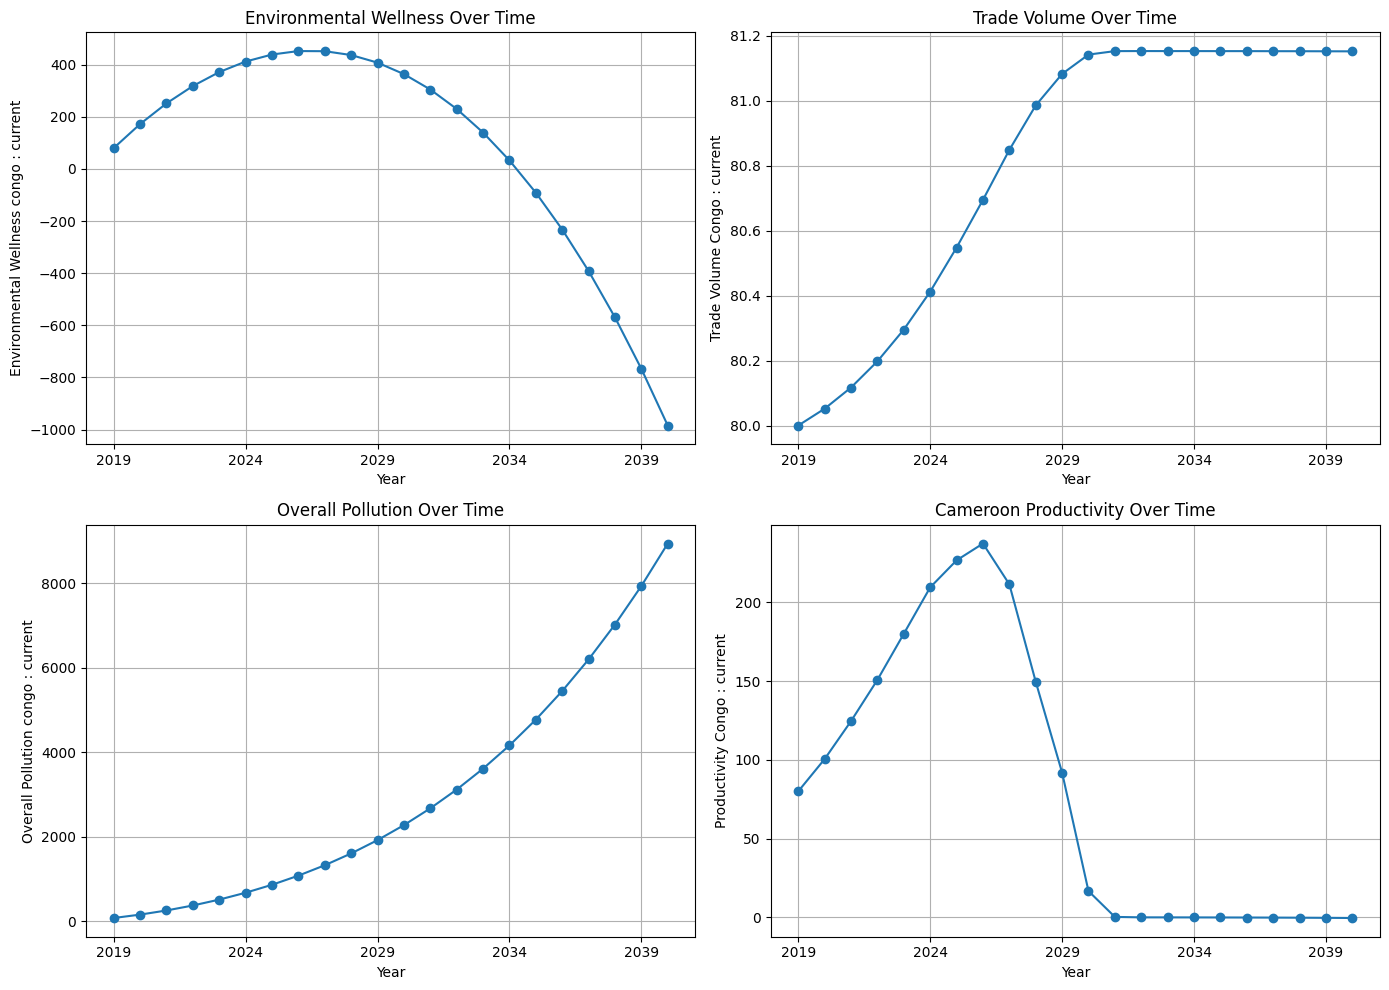

In [59]:
import matplotlib.pyplot as plt

# Define variables to plot
variables = ['Environmental Wellness congo : current', 
             'Trade Volume Congo : current', 
             'Overall Pollution congo : current', 
             'Productivity Congo : current']

titles = ['Environmental Wellness Over Time',
          'Trade Volume Over Time',
          'Overall Pollution Over Time',
          'Cameroon Productivity Over Time']

# Prepare the figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns grid

# Flatten the axs array for easy looping
axs = axs.flatten()

# Loop through variables and plot each
for i, var in enumerate(variables):
    if var in datasets["Congo"].columns:
        axs[i].plot(datasets["Congo"]['Time (Month)'], datasets["Congo"][var], marker='o')
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('Year')
        axs[i].set_ylabel(var)
        axs[i].grid(True)
        axs[i].set_xticks(datasets["Congo"]['Time (Month)'][::5])  # Interval of 5 years
    else:
        axs[i].text(0.5, 0.5, f'{var} not found', horizontalalignment='center', verticalalignment='center')
        axs[i].set_axis_off()

plt.tight_layout()
plt.show()


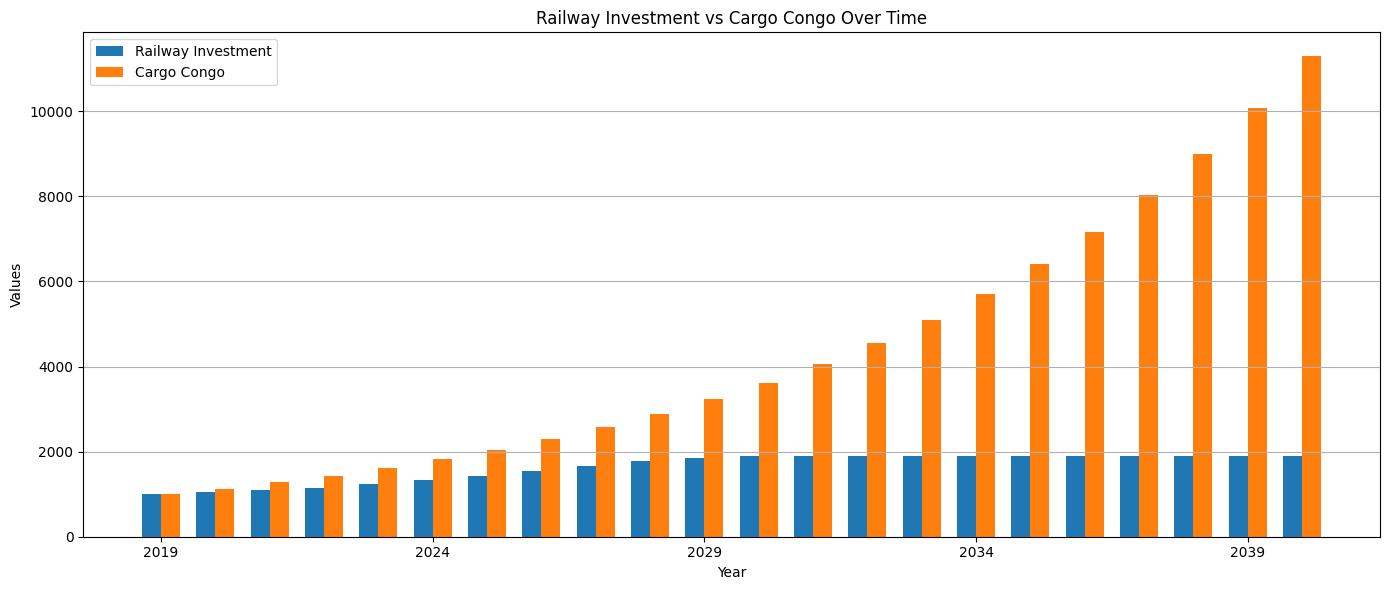

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = datasets["Congo"]['Time (Month)']
rail = datasets["Congo"]['Railway infrastructure investment Congo : current']
cargo = datasets["Congo"]['Cargo Congo : current']

x = np.arange(len(years))  # X-axis positions
width = 0.35  # Width of each bar

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, rail, width, label='Railway Investment')
plt.bar(x + width/2, cargo, width, label='Cargo Congo')

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Railway Investment vs Cargo Congo Over Time')
plt.xticks(x[::5], years[::5])  # Tick every 5 years
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


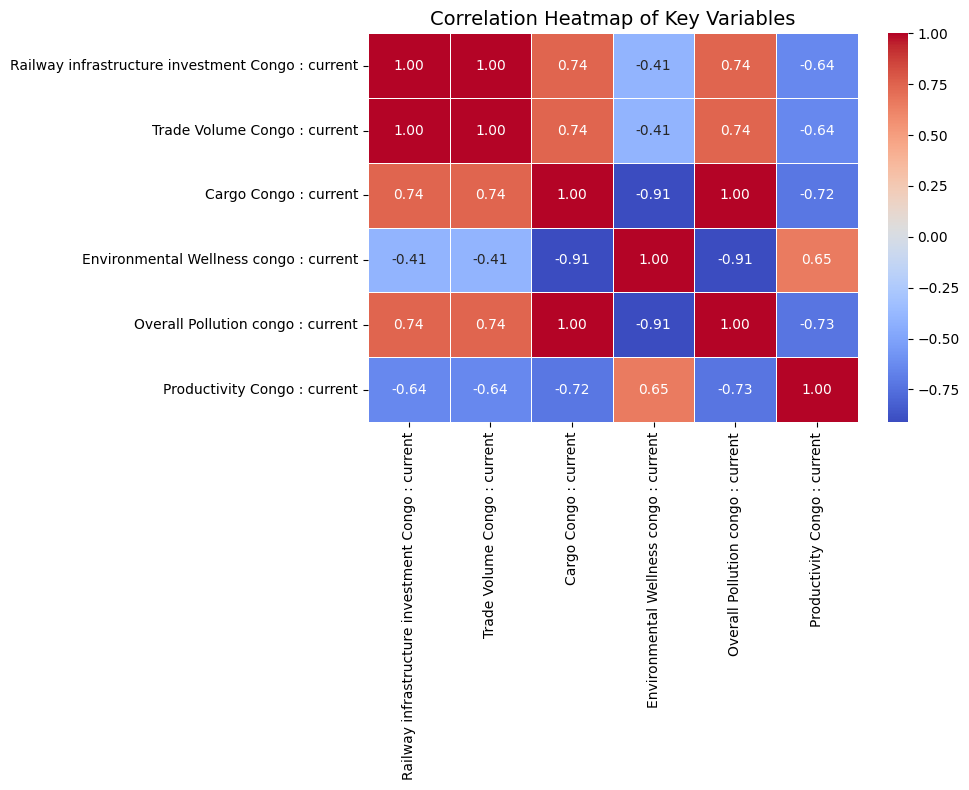

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select all relevant variables
selected_vars = ['Railway infrastructure investment Congo : current',
                 'Trade Volume Congo : current',
                 'Cargo Congo : current',
                 'Environmental Wellness congo : current',
                 'Overall Pollution congo : current',
                 'Productivity Congo : current']

# Extract the data
heatmap_data = datasets["Congo"][selected_vars]

# Compute correlation matrix
corr = heatmap_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Correlation Heatmap of Key Variables', fontsize=14)
plt.tight_layout()
plt.show()


# 3. Evaluation Metrics 

### Formulation of the equation for the efectiveness of the raiwayline in the CEMAC region

In [27]:
# Calculation

## 4. Training Model

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Generator
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
        )

    def forward(self, x):
        return self.model(x)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.model(x)

# Hyperparameters
input_dim = 10  # latent space size
data_dim = len(datasets["CEMAC"].columns) - 1  # excluding 'Time (Month)'

G = Generator(input_dim, data_dim).to(device)
D = Discriminator(data_dim).to(device)

criterion = nn.BCELoss()
lr = 0.0002

optimizer_G = optim.Adam(G.parameters(), lr=lr)
optimizer_D = optim.Adam(D.parameters(), lr=lr)

# Training loop
epochs = 1000
batch_size = 32

real_data = torch.tensor(datasets["CEMAC"].drop('Time (Month)', axis=1).values, dtype=torch.float).to(device)

for epoch in range(epochs):
    # Train Discriminator
    z = torch.randn(batch_size, input_dim).to(device)
    fake_data = G(z)

    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)

    idx = torch.randint(0, real_data.size(0), (batch_size,))
    real_batch = real_data[idx]

    D_loss_real = criterion(D(real_batch), real_labels)
    D_loss_fake = criterion(D(fake_data.detach()), fake_labels)
    D_loss = D_loss_real + D_loss_fake

    optimizer_D.zero_grad()
    D_loss.backward()
    optimizer_D.step()

    # Train Generator
    G_loss = criterion(D(fake_data), real_labels)

    optimizer_G.zero_grad()
    G_loss.backward()
    optimizer_G.step()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{epochs}] | D Loss: {D_loss.item():.4f} | G Loss: {G_loss.item():.4f}")


In [28]:
## Prediction

In [29]:
## Model Score